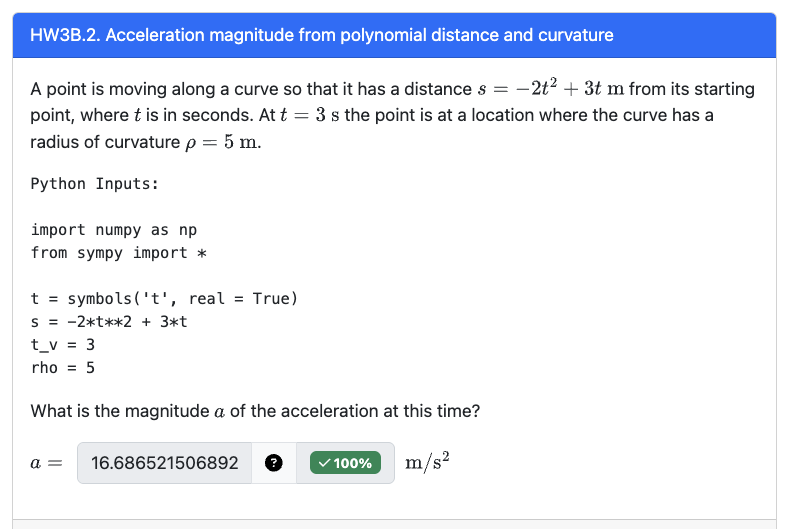

$v=\frac{ds}{dt}$  

$a_T=\frac{dv}{dt}$

$a_N=\frac{v^2}{r}$

In [50]:
# 3B.2
# 思路 
# v=ds/dt算出来切向速度
# aN=v**2/r算出来径向加速度
# aT=dv/dt算出来切向加速度

import numpy as np
from sympy import *

t = symbols('t', real = True)
s = -3*t**2 + 2*t - 2
t_v = 2
rho = 7

######################


v=diff(s,t,1)
at=diff(s,t,2)
an=v**2/rho

a=(at**2+an**2)**0.5
print(a.subs(t,t_v))


15.4945678433786


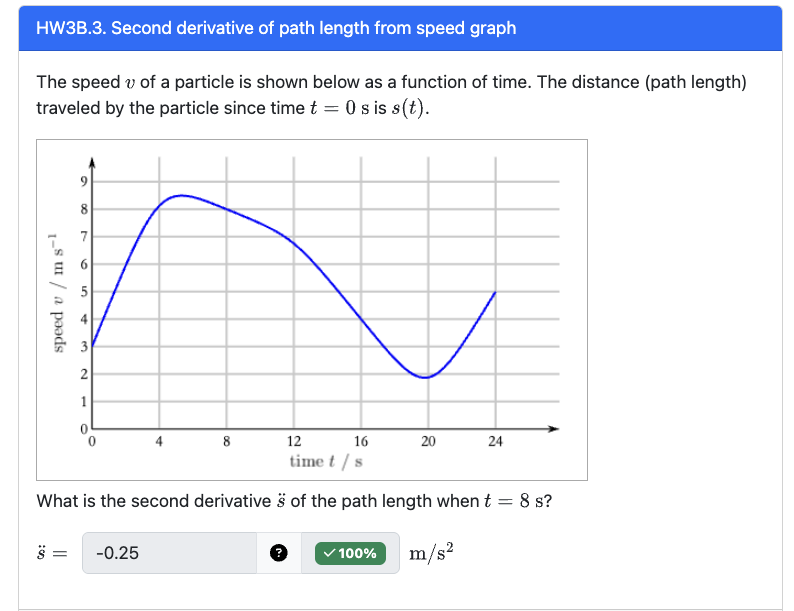

In [ ]:
# 3B.3
# 思路
# s``=at 切向加速度

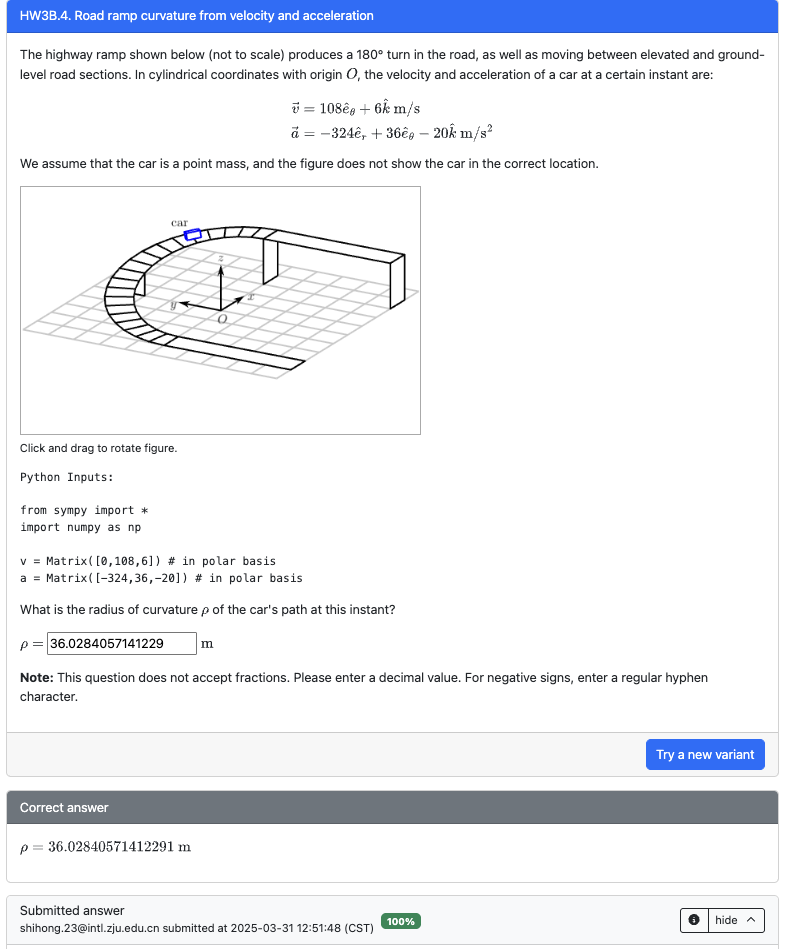

In [11]:
# 3B.4
# 思路
# k=|a x v|/|v|**3
# r=1/k

from sympy import *
import numpy as np

v = Matrix([0,44,5]) # in polar basis
a = Matrix([-44,44,-10]) # in polar basis
###################################

k=a.cross(v).norm()/v.norm()**3
r=1/k
print(r.evalf())

42.2122629899867


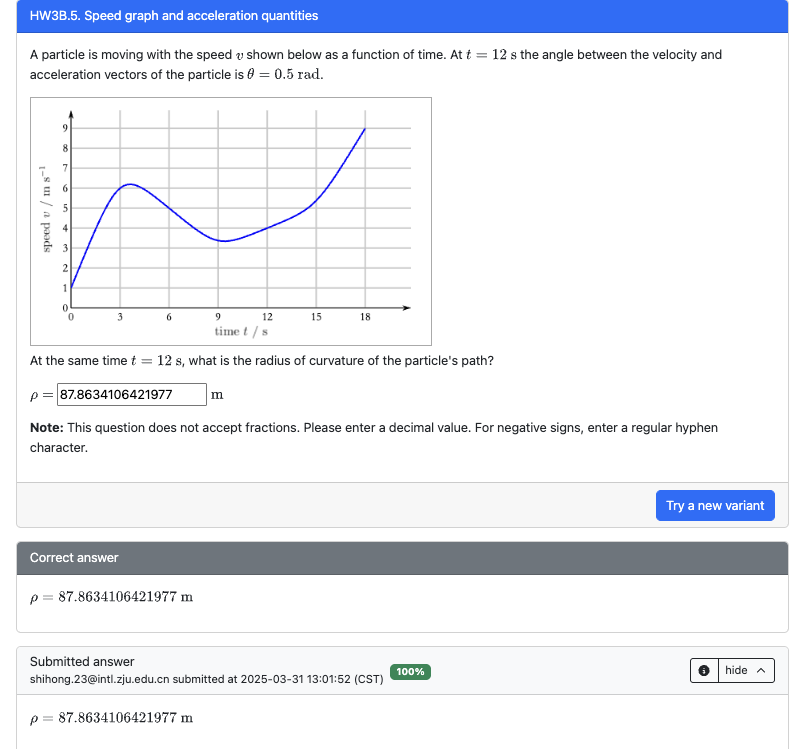

In [21]:
# 3B.5
# 一共三种题型，给a,r,theta中的一个求另一个
# aN=(a**2-at**2)**(0.5)
# aN=v**2/r
# a*sin(theta)=an 
# a*cos(theta)=at


# 读图得两个
v=5
at=1/2  #看斜率求出切向加速度
# 题目会给出a,r,theta其中一个
# a=15
r=18
# theta=0.5 
###################################

#给加速度算半径 a->r
an1=sqrt(a**2-at**2) #计算径向加速度
r1=v**2/an1          #计算半径an=v**2/r

#给半径算加速度 r->a
an2=v**2/r           #计算径向加速度
a2=sqrt(an2**2+at**2)

#给夹角算半径 theta->r
a=at/cos(theta)
an3=abs(a*sin(theta))#这里有绝对值
r3=v**2/an3

print(' a→r',r1)
print(' r→a',a2)
print(' ∠→r',r3.evalf())

 a→r 91.5243860856226
 r→a 1.47614780617627
 ∠→r 91.5243860856226


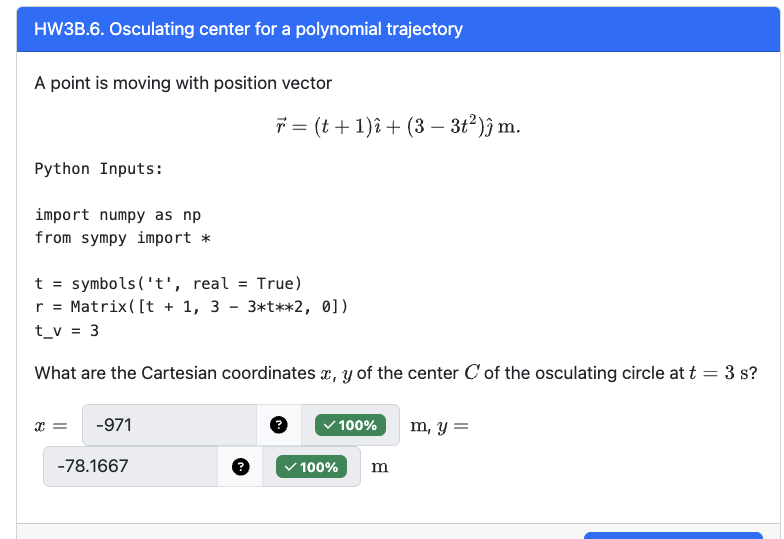

In [ ]:
# 3B.6
# 这个题我有两个解法
# 第一个是用en r计算
# 第二个是用公式直接得到圆心


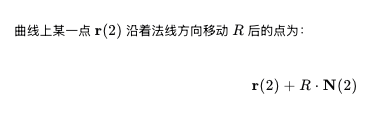

In [ ]:
# 3B.6法一
t = symbols('t', real = True)
r = Matrix([2*t**2 + t, 2*t, 0])
t_v = 2
#######################################


T=diff(r,t,1)/diff(r,t,1).norm()
N=diff(T,t,1)/diff(T,t,1).norm()

#计算曲率半径
v=diff(r,t,1).subs(t,t_v)
a=diff(r,t,2).subs(t,t_v)
radius=abs((v.cross(a).norm()/v.norm()**3)**-1)
# print(radius.evalf())

N=N.subs(t,t_v)
# print(N.evalf())
(r.subs(t,t_v)+N*radius).T.evalf()

Matrix([[31.25, -91.625, 0]])

## $x_0=x-\frac{y'[1+y'^2]}{y''}$  
## $y_0=y+\frac{[1+y'^2]}{y''}$

这里都是y对x求导

In [ ]:
# 3B.6法二
t = symbols('t', real = True)
r = Matrix([2*t**2 + t, 2*t, 0])
t_v = 2
#######################################

x=r[0]
y=r[1]

x0=x.subs(t,t_v)
y0=y.subs(t,t_v)
y1=diff(y,t)/diff(x,t) #参数方程求导：dy/dx=dy/dt*dt/dx
y2=diff(y1,t)/diff(x,t) #二阶导: d/dt(dy/dx)*dt/dx

# print(sqrt(119**2+42.5**2))
xc=float((x0-y1*(1+y1**2)/y2).subs(t,t_v)) 
yc=float((y0+(1+y1**2)/y2).subs(t,t_v))
xc,yc

(31.25, -91.625)

In [15]:
# b7
import numpy as np
from sympy import *

x = symbols('x', real = True)

m = 7
y = -3*sin(2*x)
g = -9.8
x_v = 2
vMag = 1
vDotMag = 4
# 左右
d1=1
d2=-1

v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
rho=abs((1+y1**2)**(3/2)/y2)

at_mag=d2*vDotMag
an_mag=v**2/rho

et_n=d1*Matrix([1/sqrt(y1**2+1),y1/sqrt(y1**2+1),0])

if y2>0:
    en_n=Matrix([-y1/sqrt(y1**2+1),1/sqrt(y1**2+1),0])
else:
    en_n=Matrix([+y1/sqrt(y1**2+1),-1/sqrt(y1**2+1),0])

at=at_mag*et_n
an=an_mag*en_n
print(at.evalf(),an.evalf())
a=an+at

fx=a[0]*m
fy=(a[1]-g)*m

print('fx',fx.evalf())
print('fy',fy.evalf())


Matrix([[-0.988302273076475], [-3.87598485768867], [0]]) Matrix([[0.132731893681998], [-0.0338441033832853], [0]])
fx -5.98899265576134
fy 41.2311972724963


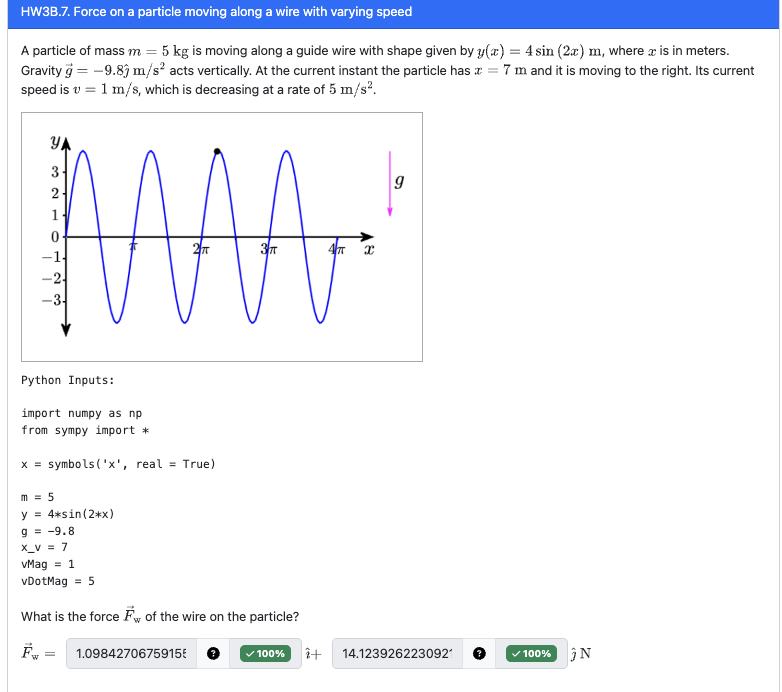

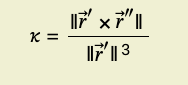
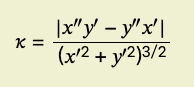
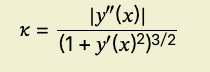

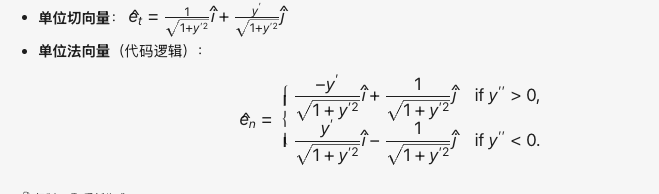

$a_{t_mag}=d2*vDotMag$

$a_{n_mag}=v^2/r$

at前面需要乘d2，an一定是正的


In [ ]:
# 3.7

# 思路
# 首先跟着文字定义d1,d2      d1代表left/right      d2代表decreasing/increasing
# r通过上面的第三个公式计算，注意要abs必须是正的
# at an值好求，at_mag=d2*vDogMag算出来切向加速度，an_mag=v**2/r算出来径向加速度,an必须是正的  这步之后得到a=..et+..en
# en et直接用公式 如上 注意判别法向量方向的方式
# ax,ay->Fx,Fy

# 这道题正负号整整花了我接近两个小时时间搞通，就是很难受，哎，md真的是没得说，服了



######################################################
m = 9
y = -2*cos(2*x)
g = -9.8
x_v = 8
vMag = 3
vDotMag = 2


# d1,d2需要自己填写!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# d1代表left/right
# d2代表decreasing/increasing
d1=1
d2=-1
d1=int(input('moving_derection='))
d2=int(input('acceleration_direction='))
######################################################



v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=abs(1/(y2/(1+y1**2)**(3/2)))

at_mag=d2*vDotMag
an_mag=v**2/r
# print("et      ",at_mag)
# print("en      ",an_mag.evalf())

# left right 左右会影响et正负方向
# en只由y‘’大小影响

et_n=d1*Matrix([1/sqrt(y1**2+1),y1/sqrt(y1**2+1),0])
# print(y2.subs(x,x_v).evalf())

if y2.subs(x,x_v)>0:
    en_n=Matrix([-y1/sqrt(y1**2+1),1/sqrt(y1**2+1),0])
else:
    en_n=Matrix([y1/sqrt(y1**2+1),-1/sqrt(y1**2+1),0])

# print('at_n      ',et_n.evalf())
# print('an_n      ',en_n.evalf())


at=at_mag*et_n
an=an_mag*en_n
a=an+at

# print('a表示成..i,..j         ',a.evalf())


fx=a[0]*m
fy=(a[1]-g)*m

print('fx',fx.evalf())
print('fy',fy.evalf())

fx -120.265050683155
fy -40.0709444120591


In [337]:
# 3B.8
m = 8
y = 4*cos(x)
g = -9.8
x_v = 7
vMag = 3
vDot = 1
# ===========
v=vMag 
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=abs(1/(y2/(1+y1**2)**(3/2)))
print('rou',r.evalf())
print("s`",vMag)
print("s``很奇怪，但是就是正的，不论是增速还是减速",vDot)

rou 7.37171620138995
s` 3
s``很奇怪，但是就是正的，不论是增速还是减速 1


In [ ]:
# 3B.9

import numpy as np
from sympy import *

x = symbols('x', real = True)

m = 6
y = cos(3*x)
g = -9.8
x_v = 3
vMag = 4
vDot = 2
# =====
d1=-1
d2=-1

# ==============
v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=abs(1/(y2/(1+y1**2)**(3/2)))
at_mag=d2*vDot
an_mag=1*v**2/r

print("et",at_mag)
print("en",an_mag.evalf())



et -2
en 32.6309150032770


In [ ]:
# 3B.10


import numpy as np
from sympy import *

x = symbols('x', real = True)

m = 7
y = -cos(x)
g = -9.8
x_v = 7
vMag = 4
vDot = 1



# d1代表increasing
d1=1
d2=-1

# ==============
v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=abs(1/(y2/(1+y1**2)**(3/2)))



# left right 左右会影响et正负方向
# en只由y‘’大小影响

et_n=d1*Matrix([1/sqrt(y1**2+1),y1/sqrt(y1**2+1),0])
# print(y2.subs(x,x_v).evalf())
if y2.subs(x,x_v)>0:
    en_n=Matrix([-y1/sqrt(y1**2+1),1/sqrt(y1**2+1),0])
else:
    en_n=Matrix([y1/sqrt(y1**2+1),-1/sqrt(y1**2+1),0])

print('at_n',et_n.evalf())
print('an_n',en_n.evalf())


# right decreasing d=-1
# right decreasing d=-1



# 1 left decreasing d1=-1
# 2 left increasing
# 3 left increasing
# 4 right decreasing 




et -1
en 7.04187328572453
at_n Matrix([[0.835765411603099], [0.549086675095929], [0]])
an_n Matrix([[-0.549086675095929], [0.835765411603099], [0]])


In [315]:
# 3B.11
import numpy as np
from sympy import *

x = symbols('x', real = True)



m = 9
y = -cos(2*x)
g = -9.8
x_v = 6
vMag = 2
vDot = 3


d1=-1
d2=1

# ==============
v=vMag
y1=diff(y,x,1).subs(x,x_v)
y2=diff(y,x,2).subs(x,x_v)
r=abs(1/(y2/(1+y1**2)**(3/2)))

at_mag=d2*vDot
an_mag=v**2/r

print("et",at_mag)
print("en",an_mag.evalf())

# left right 左右会影响et正负方向
# en只由y‘’大小影响

et_n=d1*Matrix([1/sqrt(y1**2+1),y1/sqrt(y1**2+1),0])
# print(y2.subs(x,x_v).evalf())
if y2.subs(x,x_v)>0:
    en_n=Matrix([-y1/sqrt(y1**2+1),1/sqrt(y1**2+1),0])
else:
    en_n=Matrix([y1/sqrt(y1**2+1),-1/sqrt(y1**2+1),0])

print('at_n',et_n.evalf())
print('an_n',en_n.evalf())


at=at_mag*et_n
an=an_mag*en_n
a=an+at

print(a.evalf())



# right increasing 上面的d正负变换一下
# left increasing  d反的，然后总体正负变换 d=1 a=-




et 3
en 4.27791606816948
at_n Matrix([[-0.681734064194581], [0.731600072250365], [0]])
an_n Matrix([[0.731600072250365], [0.681734064194581], [0]])
Matrix([[1.08452151197005], [5.11120132418758], [0]])
